In [1]:
import pyodbc
import pandas as pd

import numpy as np
from statsmodels.stats.descriptivestats import\
    describe as desc
from statsmodels import\
    api as sm

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import seaborn as sns

from warnings import\
    filterwarnings as FilterOutWarnings
FilterOutWarnings("ignore")

import datetime

from scipy.stats import\
    ttest_ind as T_test,\
    f_oneway as F_test
from sklearn.metrics import\
    mean_squared_error as MSE,\
    mean_absolute_error as MAE,\
    r2_score as R2


In [2]:
def getDataFrameFromSqlServer(sql_select):
    if (len(sql_select) == 0 or sql_select == ""):
        return pd.DataFrame([])
    
    connStr = "DRIVER={ODBC Driver 17 for SQL Server};SERVER=INBOOK_X1;DATABASE=PrayerTimesDW;UID=sa;PWD=abcdE!2345;"
    conn = pyodbc.connect(connStr)
    try:
        return pd.read_sql(sql=sql_select, con=conn)
    except Exception as ex:
        print(ex)
        return pd.DataFrame([])

In [3]:
sql_1 = """
    SELECT time_date, time_fajr, time_zuhr, time_asr, time_maghrib, time_isha 
    FROM t_time_prayer_source_1 WITH(NOLOCK)
    WHERE time_date >= '2024-01-01' AND time_date <= '2024-01-31'
    ORDER BY time_date ASC;
"""
df_source_1 = getDataFrameFromSqlServer(sql_1)

In [4]:
df_source_1 = df_source_1\
    .rename(columns={"time_fajr":"fajr_1", "time_zuhr":"zuhr_1",\
                     "time_asr":"asr_1", "time_maghrib":"maghrib_1",\
                        "time_isha":"isha_1"})
df_source_1

,time_date,fajr_1,zuhr_1,asr_1,maghrib_1,isha_1
0,2024-01-01,06:06:00,13:19:00,16:42:00,19:16:00,20:31:00
1,2024-01-02,06:07:00,13:20:00,16:42:00,19:17:00,20:31:00
2,2024-01-03,06:07:00,13:20:00,16:43:00,19:17:00,20:32:00
3,2024-01-04,06:08:00,13:21:00,16:43:00,19:18:00,20:32:00
4,2024-01-05,06:08:00,13:21:00,16:44:00,19:18:00,20:33:00
5,2024-01-06,06:09:00,13:22:00,16:44:00,19:19:00,20:33:00
6,2024-01-07,06:09:00,13:22:00,16:44:00,19:19:00,20:34:00
7,2024-01-08,06:10:00,13:22:00,16:45:00,19:20:00,20:34:00
8,2024-01-09,06:10:00,13:23:00,16:45:00,19:20:00,20:34:00
9,2024-01-10,06:10:00,13:23:00,16:46:00,19:21:00,20:35:00


In [5]:
sql_2 = """
    SELECT time_date, time_fajr, time_zuhr, time_asr, time_maghrib, time_isha 
    FROM t_time_prayer_source_2 WITH(NOLOCK)
    WHERE time_date >= '2024-01-01' AND time_date <= '2024-01-31'
    ORDER BY time_date ASC;
"""
df_source_2 = getDataFrameFromSqlServer(sql_2)

In [6]:
df_source_2 = df_source_2\
    .rename(columns={"time_fajr":"fajr_2", "time_zuhr":"zuhr_2",\
                     "time_asr":"asr_2", "time_maghrib":"maghrib_2",\
                        "time_isha":"isha_2"})
df_source_2

,time_date,fajr_2,zuhr_2,asr_2,maghrib_2,isha_2
0,2024-01-01,06:03:00,13:16:00,16:40:00,19:15:00,20:29:00
1,2024-01-02,06:04:00,13:17:00,16:41:00,19:15:00,20:30:00
2,2024-01-03,06:04:00,13:17:00,16:41:00,19:16:00,20:30:00
3,2024-01-04,06:05:00,13:18:00,16:42:00,19:16:00,20:31:00
4,2024-01-05,06:05:00,13:18:00,16:42:00,19:17:00,20:31:00
5,2024-01-06,06:06:00,13:19:00,16:43:00,19:17:00,20:32:00
6,2024-01-07,06:06:00,13:19:00,16:43:00,19:18:00,20:32:00
7,2024-01-08,06:07:00,13:20:00,16:44:00,19:18:00,20:32:00
8,2024-01-09,06:07:00,13:20:00,16:44:00,19:19:00,20:33:00
9,2024-01-10,06:08:00,13:21:00,16:44:00,19:19:00,20:33:00


In [7]:
# sql_3 = """
#     SELECT time_date, time_fajr, time_zuhr, time_asr, time_maghrib, time_isha 
#     FROM t_time_prayer_source_3 WITH(NOLOCK)
#     WHERE time_date >= '2024-01-01' AND time_date <= '2024-01-31'
#     ORDER BY time_date ASC;
# """
# df_source_3 = getDataFrameFromSqlServer(sql_3)

In [8]:
# df_source_3 = df_source_3\
#     .rename(columns={"time_fajr":"fajr_3", "time_zuhr":"zuhr_3",\
#                      "time_asr":"asr_3", "time_maghrib":"maghrib_3",\
#                         "time_isha":"isha_3"})
# df_source_3

In [21]:
combined_df = pd.merge(df_source_1,df_source_2,left_on=["time_date"],right_on=["time_date"])
# combined_df = pd.merge(combined_df,df_source_3,left_on=["time_date"],right_on=["time_date"])

In [22]:
combined_df

,time_date,fajr_1,zuhr_1,asr_1,maghrib_1,isha_1,fajr_2,zuhr_2,asr_2,maghrib_2,isha_2
0,2024-01-01,06:06:00,13:19:00,16:42:00,19:16:00,20:31:00,06:03:00,13:16:00,16:40:00,19:15:00,20:29:00
1,2024-01-02,06:07:00,13:20:00,16:42:00,19:17:00,20:31:00,06:04:00,13:17:00,16:41:00,19:15:00,20:30:00
2,2024-01-03,06:07:00,13:20:00,16:43:00,19:17:00,20:32:00,06:04:00,13:17:00,16:41:00,19:16:00,20:30:00
3,2024-01-04,06:08:00,13:21:00,16:43:00,19:18:00,20:32:00,06:05:00,13:18:00,16:42:00,19:16:00,20:31:00
4,2024-01-05,06:08:00,13:21:00,16:44:00,19:18:00,20:33:00,06:05:00,13:18:00,16:42:00,19:17:00,20:31:00
5,2024-01-06,06:09:00,13:22:00,16:44:00,19:19:00,20:33:00,06:06:00,13:19:00,16:43:00,19:17:00,20:32:00
6,2024-01-07,06:09:00,13:22:00,16:44:00,19:19:00,20:34:00,06:06:00,13:19:00,16:43:00,19:18:00,20:32:00
7,2024-01-08,06:10:00,13:22:00,16:45:00,19:20:00,20:34:00,06:07:00,13:20:00,16:44:00,19:18:00,20:32:00
8,2024-01-09,06:10:00,13:23:00,16:45:00,19:20:00,20:34:00,06:07:00,13:20:00,16:44:00,19:19:00,20:33:00
9,2024-01-10,06:10:00,13:23:00,16:46:00,19:21:00,20:35:00,06:08:00,13:21:00,16:44:00,19:19:00,20:33:00


In [11]:
def getColumnMinuteDiff(ref_col, calc_col):
    col = []

    if (len(ref_col) == len(calc_col)):
        for i in range(len(ref_col)):
            col.append(calc_col[i].minute - ref_col[i].minute)
    
    return col

In [23]:
combined_df["fajr_1_2"] = getColumnMinuteDiff(combined_df["fajr_1"], combined_df["fajr_2"])
combined_df["zuhr_1_2"] = getColumnMinuteDiff(combined_df["zuhr_1"], combined_df["zuhr_2"])
combined_df["asr_1_2"] = getColumnMinuteDiff(combined_df["asr_1"], combined_df["asr_2"])
combined_df["maghrib_1_2"] = getColumnMinuteDiff(combined_df["maghrib_1"], combined_df["maghrib_2"])
combined_df["isha_1_2"] = getColumnMinuteDiff(combined_df["isha_1"], combined_df["isha_2"])

In [24]:
combined_df

,time_date,fajr_1,zuhr_1,asr_1,maghrib_1,isha_1,fajr_2,zuhr_2,asr_2,maghrib_2,isha_2,fajr_1_2,zuhr_1_2,asr_1_2,maghrib_1_2,isha_1_2
0,2024-01-01,06:06:00,13:19:00,16:42:00,19:16:00,20:31:00,06:03:00,13:16:00,16:40:00,19:15:00,20:29:00,-3,-3,-2,-1,-2
1,2024-01-02,06:07:00,13:20:00,16:42:00,19:17:00,20:31:00,06:04:00,13:17:00,16:41:00,19:15:00,20:30:00,-3,-3,-1,-2,-1
2,2024-01-03,06:07:00,13:20:00,16:43:00,19:17:00,20:32:00,06:04:00,13:17:00,16:41:00,19:16:00,20:30:00,-3,-3,-2,-1,-2
3,2024-01-04,06:08:00,13:21:00,16:43:00,19:18:00,20:32:00,06:05:00,13:18:00,16:42:00,19:16:00,20:31:00,-3,-3,-1,-2,-1
4,2024-01-05,06:08:00,13:21:00,16:44:00,19:18:00,20:33:00,06:05:00,13:18:00,16:42:00,19:17:00,20:31:00,-3,-3,-2,-1,-2
5,2024-01-06,06:09:00,13:22:00,16:44:00,19:19:00,20:33:00,06:06:00,13:19:00,16:43:00,19:17:00,20:32:00,-3,-3,-1,-2,-1
6,2024-01-07,06:09:00,13:22:00,16:44:00,19:19:00,20:34:00,06:06:00,13:19:00,16:43:00,19:18:00,20:32:00,-3,-3,-1,-1,-2
7,2024-01-08,06:10:00,13:22:00,16:45:00,19:20:00,20:34:00,06:07:00,13:20:00,16:44:00,19:18:00,20:32:00,-3,-2,-1,-2,-2
8,2024-01-09,06:10:00,13:23:00,16:45:00,19:20:00,20:34:00,06:07:00,13:20:00,16:44:00,19:19:00,20:33:00,-3,-3,-1,-1,-1
9,2024-01-10,06:10:00,13:23:00,16:46:00,19:21:00,20:35:00,06:08:00,13:21:00,16:44:00,19:19:00,20:33:00,-2,-2,-2,-2,-2


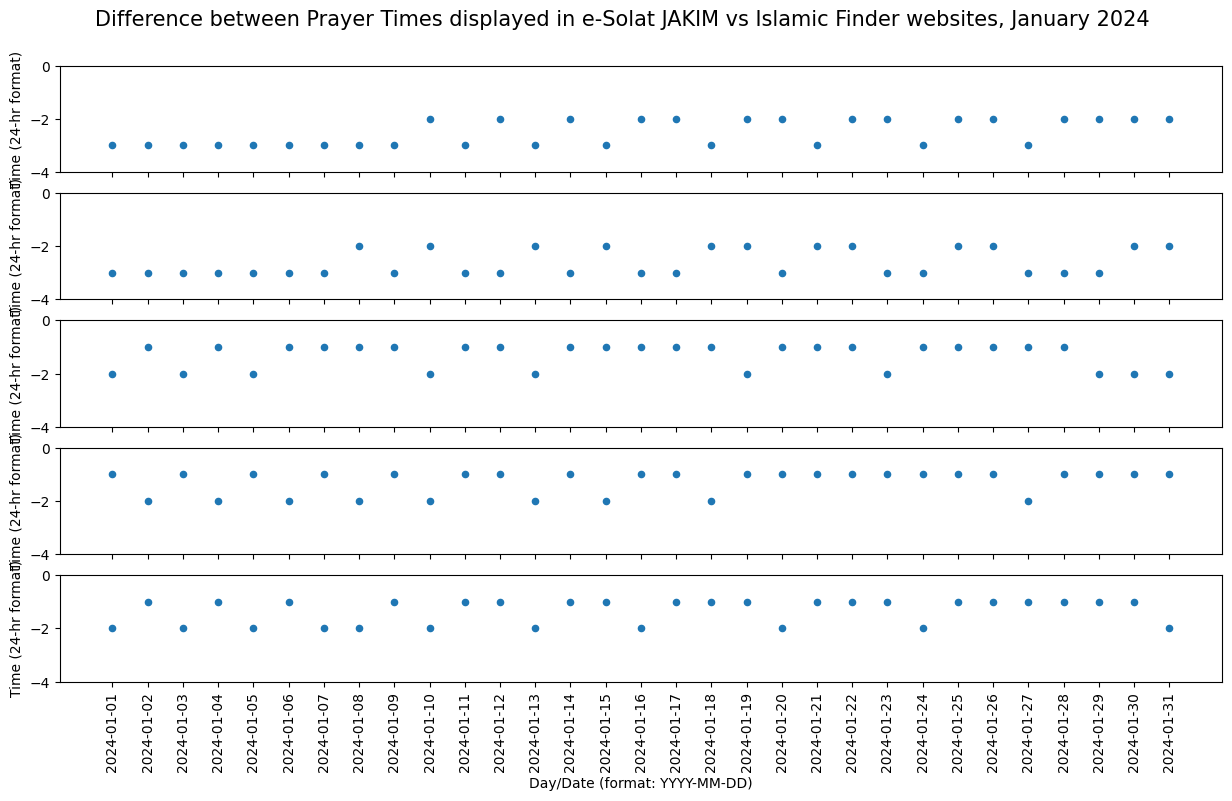

In [25]:
f1, ax1 = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(15,8))
plt.suptitle("Difference between Prayer Times displayed in e-Solat JAKIM vs Islamic Finder websites, January 2024", fontsize=15, y=0.95)
xticks = pd.date_range(combined_df["time_date"][0], combined_df["time_date"][30]).to_pydatetime()

combined_df.plot(x="time_date", y="fajr_1_2", kind="scatter", ax=ax1[0], color="C0")
combined_df.plot(x="time_date", y="zuhr_1_2", kind="scatter", ax=ax1[1], color="C0")
combined_df.plot(x="time_date", y="asr_1_2", kind="scatter", ax=ax1[2],  color="C0")
combined_df.plot(x="time_date", y="maghrib_1_2", kind="scatter", ax=ax1[3], color="C0")
combined_df.plot(x="time_date", y="isha_1_2", kind="scatter", ax=ax1[4], color="C0", xticks=xticks)

for j in range(5):
    ax1[j].set_ylabel("Time (24-hr format)")
    ax1[j].set_ylim(-4,0)

ax1[4].set_xlabel("Day/Date (format: YYYY-MM-DD)")
plt.xticks(rotation=90)
plt.show()

TypeError: no numeric data to plot

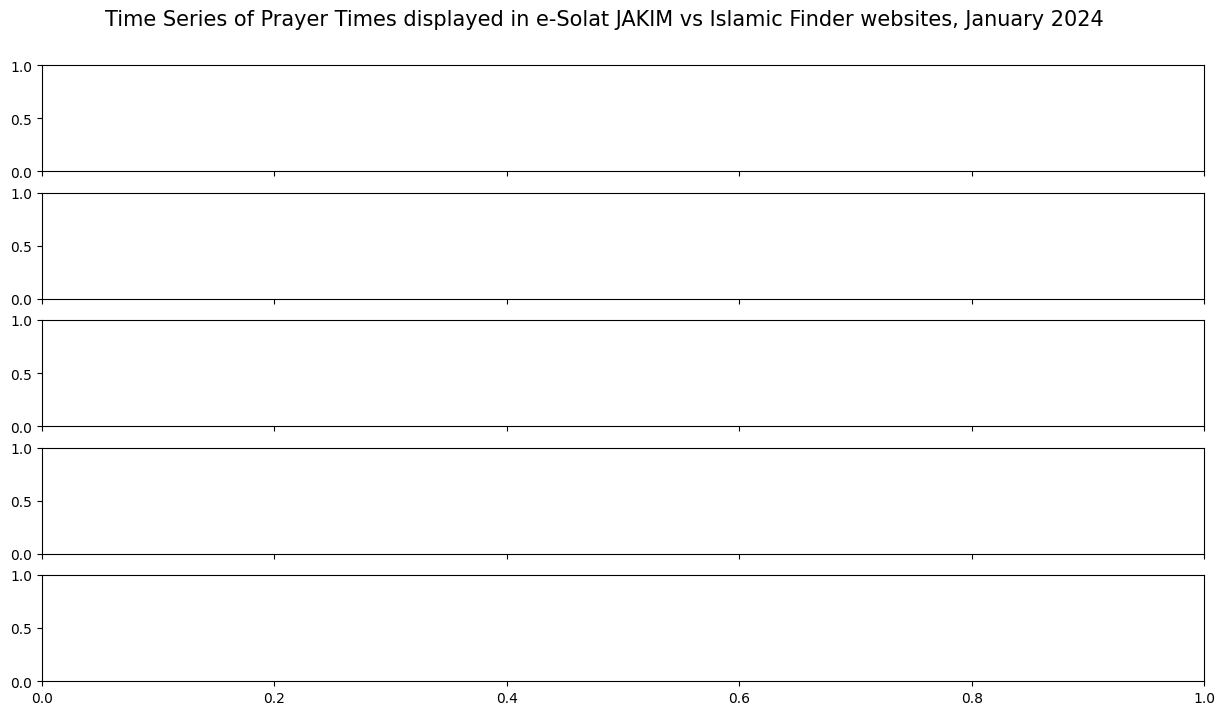

In [26]:
f2, ax2 = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(15,8))
plt.suptitle("Time Series of Prayer Times displayed in e-Solat JAKIM vs Islamic Finder websites, January 2024", fontsize=15, y=0.95)
xticks = pd.date_range(combined_df["time_date"][0], combined_df["time_date"][30]).to_pydatetime()

combined_df.plot(x="time_date", y="fajr_1", kind="line", linewidth=1, ax=ax2[0], color="C0")
combined_df.plot(x="time_date", y="zuhr_1", kind="line", linewidth=1, ax=ax2[1], color="C0")
combined_df.plot(x="time_date", y="asr_1", kind="line", linewidth=1, ax=ax2[2],  color="C0")
combined_df.plot(x="time_date", y="maghrib_1", kind="line", linewidth=1, ax=ax2[3], color="C0")
combined_df.plot(x="time_date", y="isha_1", kind="line", linewidth=1, ax=ax2[4], color="C0", xticks=xticks)

for j in range(5):
    ax2[j].set_ylabel("Time (24-hr format)")
    ax2[j].set_ylim(-4,0)

ax2[4].set_xlabel("Day/Date (format: YYYY-MM-DD)")
plt.xticks(rotation=90)
plt.show()